[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/大手飲料業界比較.ipynb)

# キリン, アサヒ, サッポロ, コカ・コーラボトラーズジャパン, ダイドーグループHD

キリン... 食領域に加え, ヘルスサイエンスや医領域への展開も進めている. (海外市場への進出)<br>
サッポロ...  酒類(アジア・カナダ・アメリカ), 食料飲料事業(国内のみにとどまる), 不動産事業<br>
コカ・コーラボトラーズジャパン...飲料製品のみの製造・販売を主に行う. また単一セグメント(飲料事業のみ)<br>
ダイドーグループHD... 自動販売機を基盤とした飲料事業が主力. 食品・医薬品事業も展開。特に健康志向の製品にも. (海外進出はアジアに限る)<br>


**※サントリー, アサヒはセグメント分類が地域ごとの分類のため除外**


In [1]:
# calculate_EXVAL ディレクトリに格納されているクラスをインストール
! pip install git+https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git
from calculate_EXVAL import DiversifyApproach
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Cloning https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git to /private/var/folders/g_/z45jvr095xx_y26gdztl1fbc0000gn/T/pip-req-build-ksos0gyd
  Running command git clone --filter=blob:none --quiet https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git /private/var/folders/g_/z45jvr095xx_y26gdztl1fbc0000gn/T/pip-req-build-ksos0gyd
  Resolved https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git to commit 11019e20f93741e4afc2ed5237d9ba861b872ac6
  Preparing metadata (setup.py) ... done


## キリンホールディングス株式会社

「国内ビール・スピリッツ事業」<br>「国内飲料事業」<br>「オセアニア酒類事業」<br>「医薬事業」<br>
**財務データ参照先**<br>
https://pdf.irpocket.com/C2503/KKjE/FmbB/foHF.pdf

In [2]:
# キリンHD株式会社の必要データを準備
KIRIN_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/KIRIN_category.csv",
    encoding = "UTF-8"
    ).set_index("Category ")


KIRIN_data

,Dom_Beer,Dom_Beverage,GLB_Alc,Medicine
Category,,,,
Sales,687010,257799,281077,442233


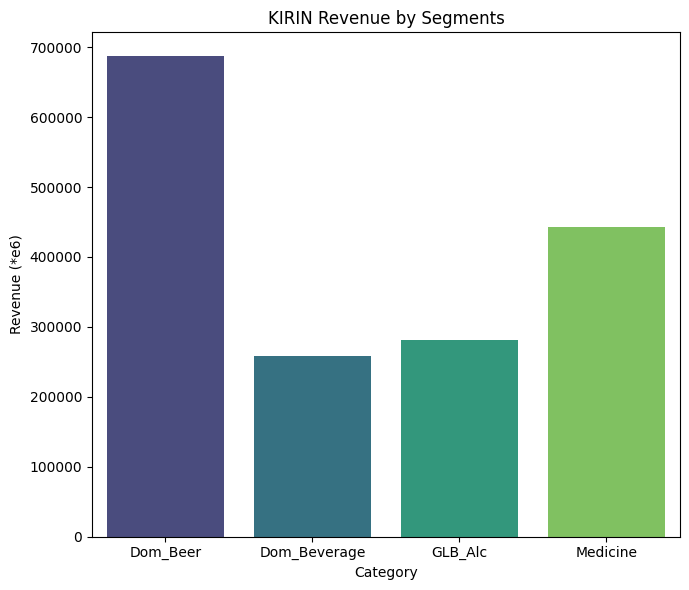

In [3]:
df = KIRIN_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("KIRIN Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://pdf.irpocket.com/C2503/KKjE/FmbB/foHF.pdf<br>
(p24を参照)
- 国内ビール・スピリッツ事業<br>
キリンビール㈱を統括会社として日本におけるビール、発泡酒、新ジャンル、洋酒他酒類製品の製造・販売<br>
- 国内飲料事業<br>
キリンビバレッジ㈱を統括会社として日本における清涼飲料の製造・販売<br>
- オセアニア種類事業<br>
LION PTY LTDを統括会社としてオセアニア地域等におけるビール, 洋酒等の製造・販売<br>
- 医薬事業<br>
協和キリン㈱を統括会社とし, 医薬品の製造・販売<br>


In [27]:
# セグメント値の設定
seg1_value = KIRIN_data["Dom_Beer"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = KIRIN_data["Dom_Beverage"].iloc[0] * 1e6
seg3_value = KIRIN_data["GLB_Alc"].iloc[0] * 1e6
seg4_value = KIRIN_data["Medicine"].iloc[0] * 1e6

seg_list = [seg1_value, seg2_value, seg3_value, seg4_value]

# 専業企業リスト
Dom_Beer = [
  "2502.T", # アサヒグループHD
  "2503.T", # キリンHD
  "2587.T", # サントリー食品インターナショナル
  "2501.T", # サッポロHD
  "2531.T", #宝HD
  "2533.T", # オエノンHD
]

Dom_Beverage = [
  "2502.T", # アサヒグループHD
  "2503.T", # キリンHD
  "2587.T", # サントリー食品インターナショナル
  "2501.T", # サッポロHD
  "2579.T", # コカ・コーラボトラーズジャパンHD
  "2593.T", # 伊藤園
  "2811.T", # カゴメ
  "2585.T", # ライフドリンクカンパニー
  "2590.T", # ダイドーグループHD
  "2594.T", # キーコーヒー
  "2573.T", # 北海道コカ・コーラボトリング
  "2597.T", # ユニカフェ
]


GLB_Alc = [
    "2502.T",  # アサヒグループHD - 欧州・アジア・オセアニアで積極展開
    "2503.T",  # キリンHD - アジアを中心に展開
    "2587.T",  # サントリー食品インターナショナル - 世界中でプレミアムブランド展開
    "2501.T",  # サッポロHD - 北米・アジア市場でのビール事業強化
    "2914.T",  # 日本たばこ産業（JT） - 海外で蒸留酒ブランドを展開
    "2229.T",  # カルビー - アジアで酒類とのペアリング需要に対応
    "2531.T",  # 宝ホールディングス - 焼酎や清酒を海外へ輸出
    "2579.T",  # コカ・コーラボトラーズジャパンHD - アルコール飲料参入（特にRTD）
    "2264.T",  # 森永乳業 - 海外でアルコール入りデザートの展開
]

Medicine = [
    "4502.T",  # 武田薬品工業
    "4503.T",  # アステラス製薬
    "4507.T",  # 塩野義製薬
    "4519.T",  # 中外製薬
    "4523.T",  # エーザイ
    "4578.T",  # 大塚ホールディングス
    "4536.T",  # 参天製薬
    "4568.T",  # 第一三共
    "4528.T",  # 小野薬品工業
    "4530.T",  # 久光製薬
    "4555.T",  # 沢井製薬
    "4516.T",  # 日本新薬
    "4541.T",  # 日医工
]


specialized_tickers = [Dom_Beer, Dom_Beverage, GLB_Alc, Medicine]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "2503.T", # キリンHD株式会社
    specialized_tickers = specialized_tickers,
    data = KIRIN_data
)

# キリンホールディングス株式会社の企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 2207580594048.0
超過価値 (EXVAL): 0.2148188446649298


## サッポロホールディングス株式会社

酒類事業 : 酒類の製造・販売、各種業態の飲食店の経営等<br>食品飲料事業 : 食品・飲料水の製造・販売等<br>不動産事業 : 不動産賃貸等

**財務データ参照先**<br>
https://www.sapporoholdings.jp/ir/library/brief/items/2023__12_tanshin.pdf<br>
(p.18)

In [28]:
# サッポロHD株式会社の必要データを準備
SAPPORO_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/SAPPORO_category.csv",
    encoding = "UTF-8"
    ).set_index("Category ")


SAPPORO_data

,Alc,FD,Develop
Category,,,
Sales,389225,120947,24090


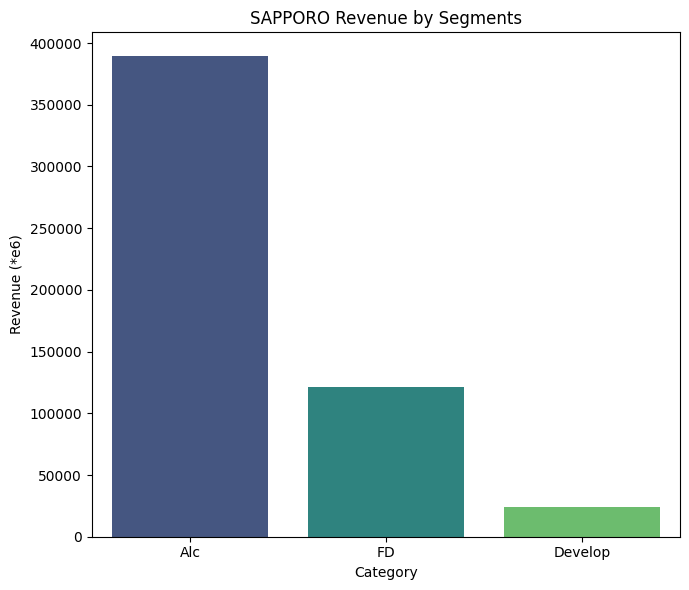

In [29]:
SAPPORO = SAPPORO_data.T.reset_index()
SAPPORO.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = SAPPORO, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("SAPPORO Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# セグメント値の設定
seg1_value = SAPPORO_data["Alc"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = SAPPORO_data["FD"].iloc[0] * 1e6
seg3_value = SAPPORO_data["Develop"].iloc[0] * 1e6

seg_list = [seg1_value, seg2_value, seg3_value]

# 専業企業リスト

Alc = [
    "2502.T",  # アサヒグループHD
    "2503.T",  # キリンHD
    "2587.T",  # サントリー食品インターナショナル
    "2501.T",  # サッポロHD
    "2531.T",  #宝HD
    "2533.T",  # オエノンHD
]

FD = [
    "2229.T",  # カルビー
    "2593.T",  # 伊藤園
    "2502.T",  # アサヒグループHD
    "2503.T",  # キリンHD
    "2587.T",  # サントリー食品インターナショナル
    "2501.T",  # サッポロHD
    "2579.T",  # コカ・コーラボトラーズジャパンHD
    "2811.T",  # カゴメ
    "2585.T",  # ライフドリンクカンパニー
    "2590.T",  # ダイドーグループHD
    "2594.T",  # キーコーヒー
    "2002.T",  # 日清製粉グループ本社
    "2802.T",  # 味の素
    "2282.T",  # 日本ハム
    "2269.T",  # 明治ホールディングス
    "2284.T",  # 伊藤ハム米久ホールディングス
    "2875.T",  # 東洋水産
    "2871.T",  # ニチレイ
    "2897.T",  # 日清食品ホールディングス
    "2914.T",  # 日本たばこ産業（JT）
    "2220.T",  # 亀田製菓
    "2206.T",  # 江崎グリコ
    "2201.T",  # 森永製菓
    "2264.T",  # 森永乳業
    "2810.T",  # ハウス食品グループ本社
]


Develop = [
    "8802.T",  # 三菱地所
    "8801.T",  # 三井不動産
    "3289.T",  # 東急不動産ホールディングス
    "8815.T",  # 東急
    "8830.T",  # 住友不動産
    "8804.T",  # 東京建物
    "8876.T",  # リログループ
    "3288.T",  # オープンハウスグループ
    "8848.T",  # レオパレス21
    "8818.T",  # 京阪神ビルディング
    "8952.T",  # ジャパンリアルエステイト投資法人
    "8920.T",  # 東祥（ビジネスホテルなどの開発）
    "1878.T",  # 大東建託（賃貸住宅開発大手）
    "8904.T",  # サンヨーホームズ
]




specialized_tickers = [Alc, FD, Develop]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "2501.T", # サッポロHD株式会社
    specialized_tickers = specialized_tickers,
    data = SAPPORO_data
)

# サッポロホールディングス株式会社の企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 773480533504.0
超過価値 (EXVAL): 0.5296644238126303


## コカ・コーラボトラーズジャパン株式会社

「飲料事業」の単一セグメント.
**財務データ参照先**<br>
https://www.ccbj-holdings.com/pdf/irinfo/208_1.pdf<br>
(p.14)

In [33]:
# コカ・コーラボトラーズジャパン株式会社の必要データを準備
ccbj_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/ccbj_category.csv",
    encoding = "UTF-8"
    ).set_index("Category ")


ccbj_data

,Beverage
Category,
Sales,868581


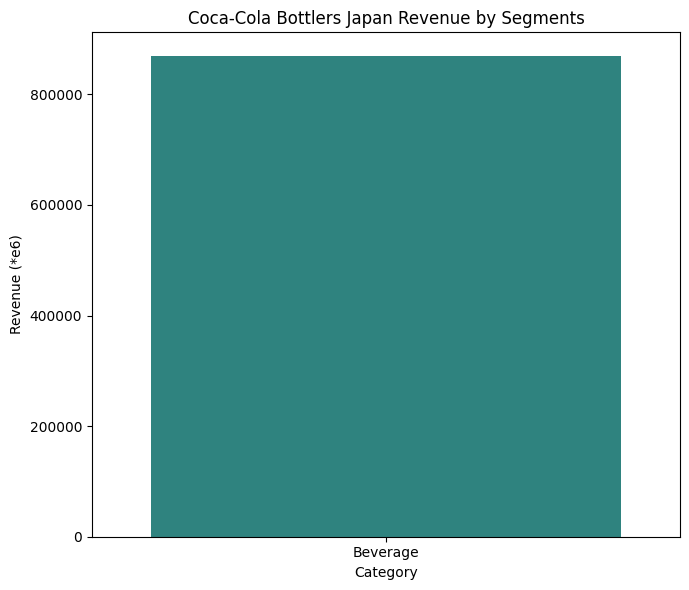

In [35]:
ccbj = ccbj_data.T.reset_index()
ccbj.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = ccbj, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Coca-Cola Bottlers Japan Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
# セグメント値の設定
seg1_value = ccbj_data["Beverage"].iloc[0] * 1e6 # 単位 : 百万円


seg_list = [seg1_value]

# 専業企業リスト

Beverage = [
    "2502.T",  # アサヒグループHD
    "2503.T",  # キリンHD
    "2587.T",  # サントリー食品インターナショナル
    "2501.T",  # サッポロHD
    "2593.T",  # 伊藤園
    "2579.T",  # コカ・コーラボトラーズジャパンHD
    "2811.T",  # カゴメ
    "2585.T",  # ライフドリンクカンパニー
    "2590.T",  # ダイドーグループHD
    "2594.T",  # キーコーヒー
    "2269.T",  # 明治ホールディングス
    "4578.T",  # 大塚HD
    "2264.T",  # 森永乳業
]

specialized_tickers = [Beverage]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "2579.T", # コカ・コーラボトラーズジャパン株式会社
    specialized_tickers = specialized_tickers,
    data = ccbj_data
)

# コカ・コーラボトラーズジャパン株式会社の企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 605732671296.0
超過価値 (EXVAL): -0.07414600818834788


In [15]:
import yfinance as yf
print(yf.Ticker("AAPL").info)

{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as w